In [2]:
import pandas as pd
import numpy as np
from pybaseball import standings
from pybaseball import schedule_and_record
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
%matplotlib inline

pd.set_option('display.max_columns', 100)

In [3]:
data = standings(2017) #list
data1 = schedule_and_record(2017, 'NYM')
data1.shape

(162, 19)

## Team Win Loss Ratio

In [4]:
test = data1.groupby(['Opp','W/L']).size().unstack('W/L').fillna(0)
test_col = (test["W"]+test['W-wo'])/(test["L"]+test['L-wo'])
# test_col

In [5]:
res = []
for i in test.index:
    dat = schedule_and_record(2017, i)
    dat = dat.groupby(['Opp','W/L']).size().unstack('W/L').fillna(0)
    dat_temp = pd.concat([(dat["W"]+dat['W-wo']),(dat["L"]+dat['L-wo'])], axis = 1)
    dat_temp.iloc[:,1] = dat_temp.iloc[:,1].replace(0, 1)
#     res1 = list(dat['W']+dat['W-wo'].fillna(0))
    r1 = dat_temp[0]/dat_temp[1]
    res.append(r1)

In [6]:
# concat(res[0], )
print(len(res))
print(res[3].shape)
team_temp = pd.concat([res[0], res[1], res[2], res[3], res[4], res[5], res[6], res[7], res[8], res[9], res[10], 
           res[11], res[12], res[13], res[14], res[15], res[16], res[17], res[18], res[19]], axis=1)

20
(20,)


In [7]:
more = ['BAL', 'BOS', 'CHW', 'CLE', 'DET', 'KCR', 'MIN', 'NYM', 'TBR', 'TOR']
res1 = []
for i in more:
    dat = schedule_and_record(2017, i)
    dat = dat.groupby(['Opp','W/L']).size().unstack('W/L').fillna(0)
    dat_temp = pd.concat([(dat["W"]+dat['W-wo']),(dat["L"]+dat['L-wo'])], axis = 1)
    dat_temp.iloc[:,1] = dat_temp.iloc[:,1].replace(0, 1)
#     res1 = list(dat['W']+dat['W-wo'].fillna(0))
    r1 = dat_temp[0]/dat_temp[1]
    res1.append(r1)

In [8]:
team_w = pd.concat([team_temp, res1[0], res1[1], res1[2], res1[3], res1[4], res1[5], res1[6], res1[7], res1[8], res1[9]], 
                   axis = 1)
team_w.columns = list(test.index)+more
col = sorted(list(test.index)+more)
team_w = team_w[col].fillna(0)

In [9]:
AL = ['BAL', 'BOS', 'CHW', 'CLE', 'DET', 'HOU', 'KCR', 'LAA', 'MIN', 'NYY', 'OAK', 'SEA', 'TBR', 'TEX', 'TOR']
NL = ['ARI', 'ATL', 'CHC', 'CIN', 'COL', 'LAD', 'MIA', 'MIL', 'NYM', 'PHI', 'PIT', 'SDP', 'SFG', 'STL', 'WSN']

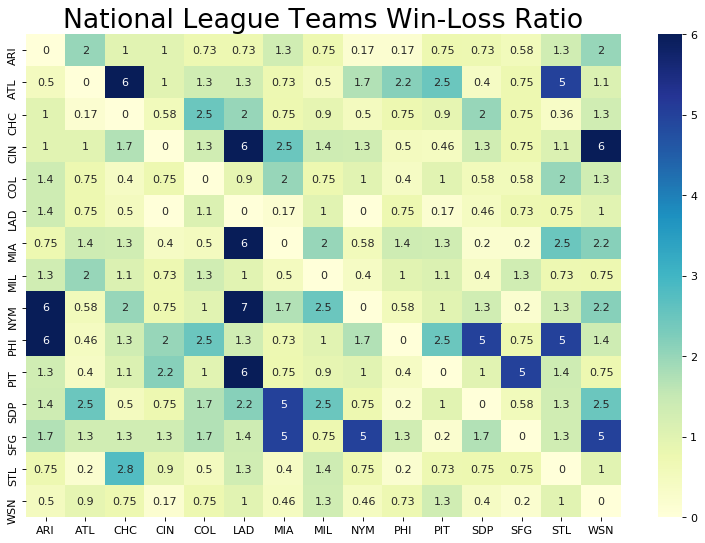

In [10]:
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

# df_AL = team_w.loc[AL, AL]
# sns.heatmap(df_AL, annot=True, vmin = 0, vmax = 6, cmap="YlGnBu")

# sns.heatmap(df, vmin=0, vmax=0.5)
# sns.plt.show()
ax = plt.axes()
df_NL = team_w.loc[NL, NL]
sns.heatmap(df_NL, annot=True, vmin = 0, vmax = 6, cmap="YlGnBu")
ax.set_title('National League Teams Win-Loss Ratio', fontsize=24)
plt.savefig('../fig/NL Ratio.jpg', dpi = 500)
# DF_NL

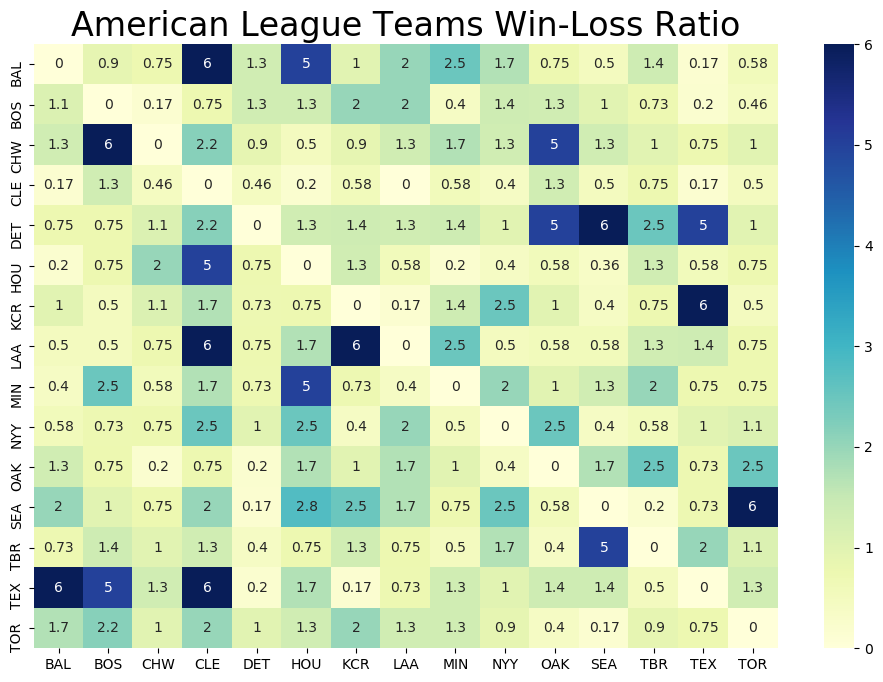

In [11]:
figure(num=None, figsize=(12, 8), dpi=100, facecolor='w', edgecolor='k')
ax = plt.axes()
df_NL = team_w.loc[AL, AL]
sns.heatmap(df_NL, annot=True, vmin = 0, vmax = 6, cmap="YlGnBu")
ax.set_title('American League Teams Win-Loss Ratio', fontsize=24)
plt.savefig('../fig/AL Ratio.jpg', dpi = 500)

## Team Win-Loss Difference

In [12]:
res = []
for i in test.index:
    dat = schedule_and_record(2017, i)
    dat = dat.groupby(['Opp','W/L']).size().unstack('W/L').fillna(0)
    dat_temp = pd.concat([(dat["W"]+dat['W-wo']),(dat["L"]+dat['L-wo'])], axis = 1)
#     dat_temp.iloc[:,1] = dat_temp.iloc[:,1].replace(0, 1)
#     res1 = list(dat['W']+dat['W-wo'].fillna(0))
    r1 = dat_temp[0] - dat_temp[1]
    res.append(r1)

In [13]:
team_temp = pd.concat([res[0], res[1], res[2], res[3], res[4], res[5], res[6], res[7], res[8], res[9], res[10], 
           res[11], res[12], res[13], res[14], res[15], res[16], res[17], res[18], res[19]], axis=1)

In [14]:
more = ['BAL', 'BOS', 'CHW', 'CLE', 'DET', 'KCR', 'MIN', 'NYM', 'TBR', 'TOR']
res1 = []
for i in more:
    dat = schedule_and_record(2017, i)
    dat = dat.groupby(['Opp','W/L']).size().unstack('W/L').fillna(0)
    dat_temp = pd.concat([(dat["W"]+dat['W-wo']),(dat["L"]+dat['L-wo'])], axis = 1)
#     dat_temp.iloc[:,1] = dat_temp.iloc[:,1].replace(0, 1)
#     res1 = list(dat['W']+dat['W-wo'].fillna(0))
    r1 = dat_temp[0] - dat_temp[1]
    res1.append(r1)

In [15]:
team_w = pd.concat([team_temp, res1[0], res1[1], res1[2], res1[3], res1[4], res1[5], res1[6], res1[7], res1[8], res1[9]], 
                   axis = 1)
team_w.columns = list(test.index)+more
col = sorted(list(test.index)+more)
team_w = team_w[col].fillna(0)

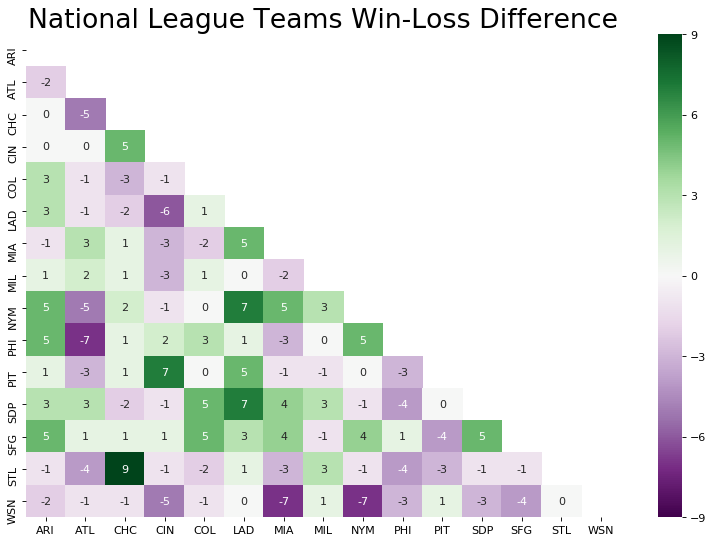

In [16]:
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

# df_AL = team_w.loc[AL, AL]
# sns.heatmap(df_AL, annot=True, vmin = 0, vmax = 6, cmap="YlGnBu")

# sns.heatmap(df, vmin=0, vmax=0.5)
# sns.plt.show()
# Generate a mask for the upper triangle
mask = np.zeros_like(df_NL, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

ax = plt.axes()
df_NL = team_w.loc[NL, NL]
sns.heatmap(df_NL, mask=mask, annot=True, cmap="PRGn")

ax.set_title('National League Teams Win-Loss Difference', fontsize=24)
plt.savefig('../fig/NL Diff.jpg', dpi = 500)
# DF_NL

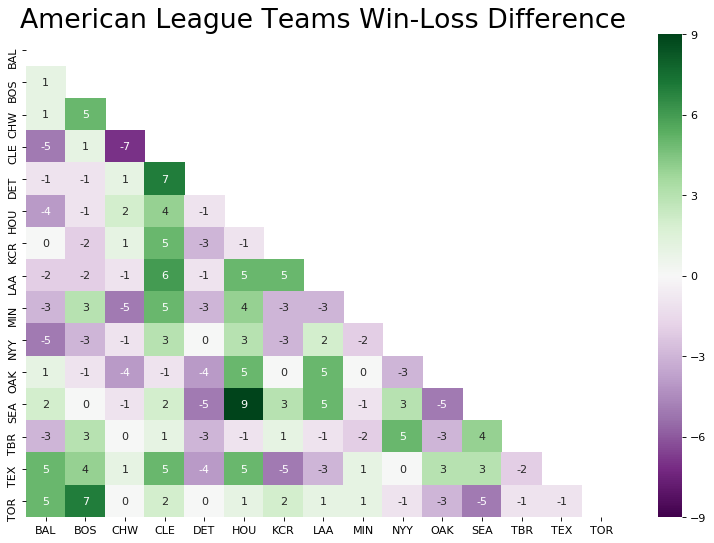

In [17]:
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

# df_AL = team_w.loc[AL, AL]
# sns.heatmap(df_AL, annot=True, vmin = 0, vmax = 6, cmap="YlGnBu")

# sns.heatmap(df, vmin=0, vmax=0.5)
# sns.plt.show()
# Generate a mask for the upper triangle
mask = np.zeros_like(df_NL, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

ax = plt.axes()
df_AL = team_w.loc[AL, AL]
sns.heatmap(df_AL, mask=mask, annot=True, cmap="PRGn")

ax.set_title('American League Teams Win-Loss Difference', fontsize=24)
plt.savefig('../fig/AL Diff.jpg', dpi = 500)
# DF_NL

In [18]:
team_wl = pd.concat([data[0], data[1], data[2], data[3], data[4], data[5]])
team_wl
# type(data[0])

,Tm,W,L,W-L%,GB
1,Boston Red Sox,93,69,.574,--
2,New York Yankees,91,71,.562,2.0
3,Tampa Bay Rays,80,82,.494,13.0
4,Toronto Blue Jays,76,86,.469,17.0
5,Baltimore Orioles,75,87,.463,18.0
1,Cleveland Indians,102,60,.630,--
2,Minnesota Twins,85,77,.525,17.0
3,Kansas City Royals,80,82,.494,22.0
4,Chicago White Sox,67,95,.414,35.0
5,Detroit Tigers,64,98,.395,38.0


In [19]:
team_gen = pd.read_csv('../input/team_general.csv')
team_gen

,yearID,lgID,teamID,name,divID,Rank,W,L
0,2017,NL,ARI,Arizona Diamondbacks,W,2,93,69
1,2017,NL,ATL,Atlanta Braves,E,3,72,90
2,2017,AL,BAL,Baltimore Orioles,E,5,75,87
3,2017,AL,BOS,Boston Red Sox,E,1,93,69
4,2017,AL,CHA,Chicago White Sox,C,4,67,95
5,2017,NL,CHN,Chicago Cubs,C,1,92,70
6,2017,NL,CIN,Cincinnati Reds,C,5,68,94
7,2017,AL,CLE,Cleveland Indians,C,1,102,60
8,2017,NL,COL,Colorado Rockies,W,3,87,75
9,2017,AL,DET,Detroit Tigers,C,5,64,98


In [20]:
team_gen1 = team_gen.merge(team_wl[['Tm', 'W-L%']], left_on = 'name', right_on = 'Tm', how = 'outer').drop(['Tm', 'yearID'], axis = 1)
team_gen1.to_csv('../output/team_gen1.csv', index = False)